In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
if (True):
  import os
  #os.chdir("drive/My Drive/")  #MAPEAR PARA O LOCAL NO DRIVE ONDE SE ENCONTRA ESSE ARQUIVO
  os.chdir("drive/My Drive/Facamp/6º Semestre/Inteligência Computacional")

In [3]:
!ls #Ver a localização desse script nas pastas

201910647_ASR1.gdoc  201910647_ASR2.gdoc  201910647_ASR5.ipynb	dataset_pipoca


# Rede Neural Convolucional

In [ ]:
# Instalar Theano
# pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Instalar Tensorflow
# pip install tensorflow

# Instalar Keras
# pip install --upgrade keras



# Parte 1 - Construir a CNN

In [4]:
# Importar pacotes
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [5]:
# Inicializar a CNN
classifier = Sequential()

# Passo 1 - Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Passo 2 - Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Segunda camada de convolução e max pooling
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Passo 3 - Flattening
classifier.add(Flatten())

# Passo 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [6]:
# Compilar a CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Visualizar o modelo compilado
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

# Parte 2 - Treinamento

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
# Base de treino
training_set = train_datagen.flow_from_directory('dataset_pipoca/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 26 images belonging to 2 classes.


In [9]:
# Base de teste
test_set = test_datagen.flow_from_directory('dataset_pipoca/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 6 images belonging to 2 classes.


In [13]:
#Treinar

classifier.fit_generator(training_set,
                         steps_per_epoch = 5,
                         epochs = 3,
                         validation_data = test_set,
                         validation_steps = 6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/3
5/5 [==============================] - 2s 93ms/step - loss: 0.7469 - accuracy: 0.5000 - val_loss: 0.6622 - val_accuracy: 0.5000


In [ ]:
# Atenção !!!
'''Treinamento com overfitting: pouquíssimos dados. 
Rede decorou as fotos do Pipoca e dos gatos. 
Não será capaz de generalizar.'''

# Parte 3 - Fazendo novas previsões

{'gato': 0, 'pipoca': 1}
pipoca: abrir a porta!


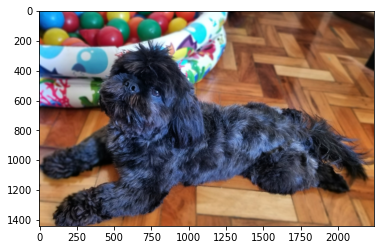

In [14]:
import numpy as np
from keras.preprocessing import image

# PIPOCA -------------------------#
image_path = 'dataset_pipoca/single_prediction/pipoca.jpg'
import matplotlib.pyplot as plt
plt.imshow(image.load_img(image_path))

test_image = image.load_img(image_path, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(training_set.class_indices)
if result[0][0] == 1:
    prediction = 'pipoca: abrir a porta!'
else:
    prediction = 'gato: fechar a porta!'
    
print(prediction)    

gato: fechar a porta!


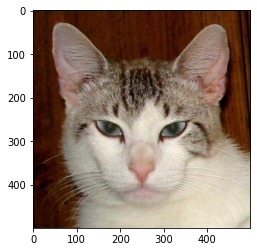

In [15]:
# GATO -------------------------#
image_path2 = 'dataset_pipoca/single_prediction/gato.jpg'
import matplotlib.pyplot as plt
plt.imshow(image.load_img(image_path2))

test_image = image.load_img(image_path2, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'pipoca: abrir a porta!'
else:
    prediction = 'gato: fechar a porta!'
    
print(prediction) 